# Scipy 

Scipy is an extremely versatile Python math module. It contains among others the following sub-modules:
* Special functions
* Integration
* Optimization
* Interpolation
* Fourier Transforms
* Signal Processing
* Linear Algebra
* Compressed Sparse Graph Routines
* Spatial data structures and algorithms
* Statistics
* Image Processing
* File IO

Today, we are going to study four particular sub-modules:
* Special Functions
* Statistics
* File IO
* Linea Algebra


## Scipy IO
The first module we are studying is the preliminary, the scipy.io I/O module.  

This module is particularly useful to open mathematical files from other tools such as Matlab, Fortan or NetCDF.  




#### Matlab
The next cell shows how to save a *numpy* array as a matlab file. Notice that we are saving a dictionary. In fact, from the edge of matlab, the objects are similar to structures resembling our python dictionaries. So, the conversion is implicitly done between matlab structures and python dictionaries in the scipy module.

In [1]:
!pip install expects

In [17]:
from expects import expect, equal
import scipy.io as sio
from scipy import stats
import numpy as np
np.random.seed(22)
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

array = np.arange(100).reshape(10,10)
sio.savemat("matrix.mat", {"matrix": array})


The `whosmat` function allows us to inspect the *.mat* file before opening it. This can be useful for quality assurance.

In [18]:
sio.whosmat("matrix.mat")

[('matrix', (10, 10), 'int64')]

In [19]:
data = sio.loadmat("matrix.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Aug  6 10:12:59 2020',
 '__version__': '1.0',
 '__globals__': [],
 'matrix': array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])}

#### Fortran
Fortran files are somewhat more difficult to access since there is no compliance between different versions of Fortran. Moreover, depending on which machine a Fortran version is running, the result can be different!  
We can interact with files called *unformatted sequential files*.

In [20]:
array2 = np.arange(100, 200).reshape(10, 10)

with sio.FortranFile("data.unf", "w") as f:
    f.write_record(array2)


In [21]:
with sio.FortranFile("data.unf", "r") as f:
    data = f.read_record(np.int64)
    print(data)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]


## Scipy Statistics
We can access observations of random variables from the *numpy* module. This is a simple example:


In [22]:
import numpy as np
obs = np.random.binomial(n=100, p=0.3, size=40)
obs

array([26, 30, 29, 35, 26, 28, 27, 32, 26, 34, 20, 31, 34, 33, 26, 19, 33,
       38, 32, 28, 33, 32, 29, 31, 29, 31, 32, 24, 37, 41, 32, 34, 22, 26,
       35, 33, 30, 25, 30, 30])

On the other hand, the *scipy.statistics* module produces the random variable in itself, and allows us to access the observations using the method.

In [23]:
from scipy.stats import binom, zipf

va = binom(n=100, p=0.3)

In [24]:
print(f"mean of the random variable: {va.mean()}")
print(f"generated observations: {va.rvs(size=40)}")
print(f"skewness: {va.stats(moments='s')}")

mean of the random variable: 30.0
generated observations: [28 22 29 24 22 32 35 25 25 30 26 34 31 29 40 32 26 26 30 28 36 24 28 26
 33 34 33 26 35 19 28 38 37 21 32 26 31 27 25 30]
skewness: 0.08728715609439695


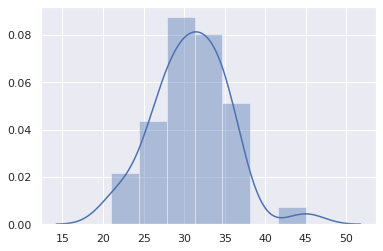

In [25]:
sns.distplot(va.rvs(size=40))

In [26]:
va_zip = zipf(a=2)

In [27]:
print(f"mean of the random variable: {va_zip.mean()}")
print(f"generated_observations: {va_zip.rvs(size=40)}")
print(f"skewness: {va_zip.stats(moments='s')}")

mean of the random variable: inf
generated_observations: [ 2  7  2  1  1  1  2  1  1  7  1  6  1 10  1  2  1  1  1  1  2  1  2  7
  1  4  1  3  1  1  1  1  6  1  2  1  4  1  1  1]
skewness: nan


/home/jackson/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1078: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


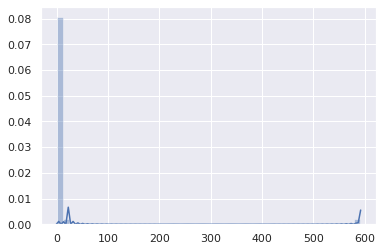

In [28]:
sns.distplot(va_zip.rvs(size=40))

Probability distributions *are* grouped into two categories: continuous and discrete distributions.  
For example, continuous distributions have the following methods:

* rvs: obtain a series of random observations
* pdf: density random variable
* cdf: distribution function
* sf: survival function (1 - CDF)
* ppf: quantile function (inverse of cdf)
* isf: inverse of the survival function.
* stats: information on the moments


#### Exercise 1
In this first exercise, please define a random variable based on a normal probability distribution with a standard deviation of 5 and a mean of 10.

In [29]:

va_norm = None

expect(va_norm.mean()).to(equal(10.))

AttributeError: 'NoneType' object has no attribute 'mean'

So this is a simple way to generate random variables based on probability distributions. Now let's look at how to use comparisons and transformations on these variables.

Let's start with a simple example of these transformations.

In [ ]:
from scipy.stats import cauchy

# generate  a cauchy random variable
va_cauchy = cauchy(loc=100)

fig, ax = plt.subplots()
ax.set_xlim([90, 110])
sns.distplot(va_cauchy.rvs(size=50))



In [ ]:
# is our cauchy distribution close to a 
# normal distribution?

fig = plt.figure()
ax1 = fig.add_subplot(211)
cauch = va_cauchy.rvs(size=100)
prob = stats.probplot(cauch, dist=stats.norm, plot=ax1)
ax1.set_xlabel("")
ax1.set_title("initial cauchy dist")

ax2 = fig.add_subplot(212)
cauch_box, _ = stats.boxcox(cauch)
prob = stats.probplot(cauch_box, dist=stats.norm, plot=ax2)

ax2.set_title("cauchy dist after boxplot")

In [ ]:
# we can use an Anderson-Darling test to determine
# if our cauchy distribution is relatively close to a normal one


statistic, crit_value, sign_level = stats.anderson(cauch_box)
statistic, crit_value, sign_level

In [ ]:
# comparing the cauchy random variable
# before the box cox
stats.anderson(cauch)

#### Exercise 2
Perform the Anderson-Darling test with your normal probability distribution generated in Exercise 1.


In [ ]:
# exercise 2

It turns out that we can also apply the maximum likelihood method to apply a dataset to a probability distribution. Here is an example:

In [ ]:
x = va_cauchy.rvs(size=200, random_state=22)
loc, scale= norm.fit(x)
loc, scale

In [ ]:
fig, ax = plt.subplots(1,2)

ax[0].set_xlim([0, 0.175])
ax[0].set_xlim([0, 200])
ax[1].set_ylim([0, 0.175])
ax[1].set_xlim([0, 200])

sns.distplot(x, ax=ax[0])
sns.distplot(norm(loc=loc, scale=scale).rvs(size=200, random_state=22), ax=ax[1])

Let's now look at how to use the pdf and cdf functions of a probability distribution.

In [ ]:
range_ = np.linspace(va_cauchy.ppf(0.01), va_cauchy.ppf(0.99), 100)
sns.lineplot(range_, va_cauchy.pdf(range_))

In [ ]:
sns.lineplot(range_, va_cauchy.cdf(range_))

## Scipy Special
We will spend only a few minutes on the `scipy.special` module since it is quite specific and mainly used for advanced applications in mathematics and physics. The goal is mainly to inform you about its features.  

Let's start with the easiest part, i.e. permutations and combinations.

In [ ]:
from scipy import special
from scipy.special import comb, perm

numb_comb = comb(12, 3, exact=True, repetition=True)
numb_perm = perm(12, 3, exact=True)

print(f"number of combinations: {numb_comb}, number of permutations: {numb_perm}")

the complete list of available functions available from the `help` function.

In [ ]:
# help(special)

In [ ]:
# we can try entropy functions

x = norm().rvs(size=100)

special.entr(x)

In [ ]:
# or gamma functions
special.gamma(x)

## Scipy Linalg
The `scipy.linalg` module contains all the functionality of `numpy.linalg`, but also contains more.

In addition, the `scipy.linalg` module is compiled with LAPACK (linear algebra package, Fortran) which generally makes it faster than numpy which does not necessarily require this module.  

Therefore, it is generally better to use `scipy.linalg`.


Let's start with a short introduction to matrices and their basic operations. We use the *array numpy* to represent the matrices.

In [ ]:
mat1 = np.array([[1,2], [3,4]])
mat2 = np.array([[5,6], [7,8]])

elementwise = mat1 * mat2
mat_mul = mat1 @ mat2

elementwise, mat_mul

In [ ]:
transpose = mat1.T
transpose

#### Exercise 3
Compute the following algebraic equation:
$$
AB + 2B^2  - I
$$
où
$$
A = \begin{bmatrix} 5 & 7 \\ 8 & 9 \end{bmatrix}
$$
et 
$$
B = \begin{bmatrix} 0 & 1 \\ 2 & 7 \end{bmatrix}
$$

In [ ]:
# exercise 3


The next cell is an initiation to the linalg module. 
We instantiate the following matrix
$$
\begin{bmatrix}
10 & 11 & 12 \\
13 & 14 & 15 \\
16 & 17 & 18 \\
\end{bmatrix}
$$
We will determine whether the matrix is invertible using its 
decomposition into singular values.

The number of elements > 0 in the singular value vector 
provides information on the rank of the matrix in question

In [ ]:
# using singular value decomposition 
# to determine if a matrix has full rank 
from scipy import linalg

mat = np.arange(9).reshape(3,3) + 10

u, s, v = linalg.svd(mat)
np.sum(s > 1e-10)


Now let's try with the following invertible matrix:
$$
\begin{bmatrix}
1 & 3 & 7 \\
2 & 8 & 3 \\
7 & 8 & 1
\end{bmatrix}
$$

In [ ]:
# oups, we have a singular matrix
mat2 = np.array([
    [1,3,7],
    [2,8,3],
    [7,8,1]
])

u, s, v = linalg.svd(mat2)
np.sum(s > 1e-10)

In [ ]:
# much better
linalg.inv(mat2)

In [ ]:
# we can also check if our matrix is invertible
# by computing the determinant (!= 0)
d1 = linalg.det(mat)
d2 = linalg.det(mat2)


print(f"first determinant is {d1} second one is {d2}")

In [ ]:
# we can compute the norms using the `norm` function
# for a matrix, the default norm is the frobenius norm
norm1 = linalg.norm(mat)
norm2 = linalg.norm(mat2)

print(f"first norm: {norm1}, second norm: {norm2}")

In [ ]:
linalg.pinv(mat)

In [ ]:
# eigenvalues and eigenvectors

la, v = linalg.eig(mat)
print(f"our eigenvalues are {la} and eigenvectors are {v}")